In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

energy_dataset = pd.read_csv("energy_dataset.csv")
weather_features = pd.read_csv("weather_features.csv")
energy_dataset.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,...,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,...,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,...,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


In [2]:
weather_features.head(10)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 05:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 06:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 07:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
8,2015-01-01 08:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d
9,2015-01-01 09:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [3]:
df_energy = energy_dataset.copy()
df_weather = weather_features.copy()

print(f" Veri setinin boyut sayısı: {df_energy.ndim}\n",
     f"Veri setinin boyut bilgisi: {df_energy.shape}\n",
     f"Veri setindeki toplam eleman sayısı: {df_energy.size}\n")

 Veri setinin boyut sayısı: 2
 Veri setinin boyut bilgisi: (35064, 29)
 Veri setindeki toplam eleman sayısı: 1016856



In [4]:
print(f" Veri setinin boyut sayısı: {df_weather.ndim}\n",
     f"Veri setinin boyut bilgisi: {df_weather.shape}\n",
     f"Veri setindeki toplam eleman sayısı: {df_weather.size}\n")

 Veri setinin boyut sayısı: 2
 Veri setinin boyut bilgisi: (178396, 17)
 Veri setindeki toplam eleman sayısı: 3032732



In [5]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [6]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [7]:
df_energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [8]:
df_energy.fillna(df_energy.median()[:], inplace = True)

In [9]:
df_energy.isnull().sum()

time                                               0
generation biomass                                 0
generation fossil brown coal/lignite               0
generation fossil coal-derived gas                 0
generation fossil gas                              0
generation fossil hard coal                        0
generation fossil oil                              0
generation fossil oil shale                        0
generation fossil peat                             0
generation geothermal                              0
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption        0
generation hydro run-of-river and poundage         0
generation hydro water reservoir                   0
generation marine                                  0
generation nuclear                                 0
generation other                                   0
generation other renewable                         0
generation solar                              

In [10]:
df_energy.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,383.504592,85.331679,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35064.0,448.090492,354.480256,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35064.0,5622.401894,2201.315046,0.00,4127.0000,4969.00,6428.00,20034.00
generation fossil hard coal,35064.0,4256.177618,1961.103657,0.00,2528.7500,4474.00,5837.00,8359.00
generation fossil oil,35064.0,298.320699,52.506455,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
columns_to_drop = ["generation fossil coal-derived gas", "generation fossil oil shale", "generation fossil peat",
                  "generation geothermal", "generation marine", "generation wind offshore","generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"]
df_energy = df_energy.drop(columns = columns_to_drop)
df_energy.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,383.504592,85.331679,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35064.0,448.090492,354.480256,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35064.0,5622.401894,2201.315046,0.00,4127.0000,4969.00,6428.00,20034.00
generation fossil hard coal,35064.0,4256.177618,1961.103657,0.00,2528.7500,4474.00,5837.00,8359.00
generation fossil oil,35064.0,298.320699,52.506455,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35064.0,475.356491,792.248672,0.00,0.0000,68.00,615.00,4523.00
generation hydro run-of-river and poundage,35064.0,972.080282,400.671889,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35064.0,2604.888290,1834.755832,0.00,1078.0000,2164.00,3756.25,9728.00
generation nuclear,35064.0,6264.053502,839.490721,0.00,5761.0000,6566.00,7024.00,7117.00
generation other,35064.0,60.226928,20.233318,0.00,53.0000,57.00,80.00,106.00


In [12]:
list(df_energy.columns)[15:21]

['forecast solar day ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual']

In [13]:
print(df_energy["generation biomass"].value_counts())
print("-" * 20)
print(df_energy["generation fossil brown coal/lignite"].value_counts())
print("-" * 20)
print(df_energy["generation fossil gas"].value_counts())
print("-" * 20)
print(df_energy["generation fossil hard coal"].value_counts())
print("-" * 20)
print(df_energy["generation fossil oil"].value_counts())
print("-" * 20)
print(df_energy["generation hydro pumped storage consumption"].value_counts())
print("-" * 20)
print(df_energy["generation hydro run-of-river and poundage"].value_counts())
print("-" * 20)
print(df_energy["generation hydro water reservoir"].value_counts())
print("-" * 20)
print(df_energy["generation nuclear"].value_counts())
print("-" * 20)
print(df_energy["generation other"].value_counts())
print("-" * 20)
print(df_energy["generation other renewable"].value_counts())
print("-" * 20)
print(df_energy["generation waste"].value_counts())
print("-" * 20)
print(df_energy["generation wind onshore"].value_counts())
print("-" * 20)
print(df_energy["forecast solar day ahead"].value_counts())
print("-" * 20)
print(df_energy["forecast wind onshore day ahead"].value_counts())
print("-" * 20)
print(df_energy["total load forecast"].value_counts())
print("-" * 20)
print(df_energy["total load actual"].value_counts())
print("-" * 20)
print(df_energy["price day ahead"].value_counts())
print("-" * 20)
print(df_energy["price actual"].value_counts())
print("-" * 20)

361.0    321
362.0    318
367.0    315
351.0    310
359.0    305
        ... 
101.0      1
589.0      1
174.0      1
175.0      1
168.0      1
Name: generation biomass, Length: 423, dtype: int64
--------------------
0.0      10517
663.0      165
664.0      124
595.0      108
657.0      103
         ...  
144.0        1
39.0         1
87.0         1
41.0         1
35.0         1
Name: generation fossil brown coal/lignite, Length: 956, dtype: int64
--------------------
4969.0    25
4180.0    24
3993.0    24
4227.0    21
3856.0    21
          ..
3284.0     1
3323.0     1
8903.0     1
9341.0     1
8024.0     1
Name: generation fossil gas, Length: 8297, dtype: int64
--------------------
4474.0    23
5266.0    16
6176.0    15
4747.0    15
5324.0    15
          ..
666.0      1
671.0      1
654.0      1
663.0      1
3443.0     1
Name: generation fossil hard coal, Length: 7266, dtype: int64
--------------------
300.0    342
303.0    335
309.0    328
304.0    326
308.0    320
        ... 
122.

<AxesSubplot:xlabel='generation biomass'>

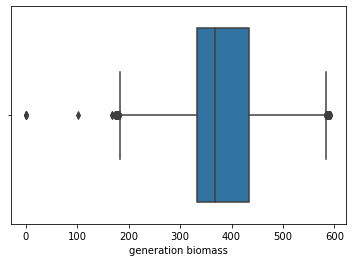

In [14]:
sns.boxplot(df_energy["generation biomass"])

<AxesSubplot:xlabel='generation fossil brown coal/lignite'>

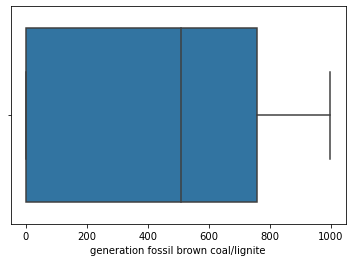

In [15]:
sns.boxplot(df_energy["generation fossil brown coal/lignite"])

In [16]:
from sklearn.neighbors import LocalOutlierFactor
df_num = df_energy.select_dtypes(include=["float64", "int64"])
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
fit = clf.fit_predict(df_num)
df_scores = clf.negative_outlier_factor_
print(df_scores[0:10])

[-1.07287361 -1.15535587 -1.16073867 -1.01477163 -1.08179224 -1.08870622
 -1.04675871 -1.04660999 -1.09663193 -1.17142102]


In [17]:
np.sort(df_scores)[0:50]

array([-4.38955627, -4.32712305, -4.17489329, -4.0029864 , -3.80567405,
       -3.43961544, -3.28859679, -2.95463012, -2.85648109, -2.74139603,
       -2.60991698, -2.52277086, -2.52260459, -2.50933089, -2.50577667,
       -2.43650375, -2.42474736, -2.42289071, -2.40095399, -2.30173643,
       -2.26795101, -2.25326253, -2.21993406, -2.21962716, -2.19360932,
       -2.12122224, -2.11877181, -2.07655147, -2.00345074, -1.92934095,
       -1.68438241, -1.65925543, -1.65079179, -1.63311836, -1.62633599,
       -1.60638708, -1.60231089, -1.56810008, -1.55470291, -1.54241435,
       -1.54033786, -1.53267001, -1.53141665, -1.52858214, -1.51040426,
       -1.50994577, -1.49884335, -1.49310154, -1.49152365, -1.49022744])

In [18]:
esik_deger = np.sort(df_scores)[4:5]
aykiri_tf = df_scores > esik_deger
new_df = df_num[df_scores > esik_deger]
df_num[df_scores < esik_deger]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
2025,101.0,0.0,1854.0,1762.0,87.0,0.0,283.0,4070.0,6314.0,17.0,14.0,401.0,39.0,2387.0,1949.0,10036.0,34724.0,21218.0,51.50,62.79
5706,324.0,481.0,4219.0,4044.0,122.0,15.0,362.0,716.0,3939.0,48.0,43.0,1567.0,156.0,3806.0,2615.0,6380.0,31545.0,18616.0,62.23,70.71
25164,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4325.0,7561.0,33805.0,28901.0,60.53,66.17
25171,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5679.0,35592.0,28901.0,68.05,75.45


In [19]:
new_df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [20]:
list(new_df.columns)

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual']

In [21]:
new_df.rename(columns={'generation biomass': 'biomass',
 'generation fossil brown coal/lignite': 'brown_coal',
 'generation fossil gas': 'gas',
 'generation fossil hard coal': 'hard_coal',
 'generation fossil oil': 'oil',
 'generation hydro pumped storage consumption': 'hydro_pumped_storage',
 'generation hydro run-of-river and poundage': 'hydro_ror_poundage',
 'generation hydro water reservoir': 'hydro_w_reservoir',
 'generation nuclear': 'nuclear',
 'generation other': 'other',
 'generation other renewable': 'other_renewable',
 'generation solar': 'solar',
 'generation waste': 'waste',
 'generation wind onshore': 'wind_onshore',
 'forecast solar day ahead': 'solar_day',
 'forecast wind onshore day ahead': 'wind_onshore',
 'total load forecast': 't_forecast',
 'total load actual': 't_actual',
 'price day ahead': 'p_ahead',
 'price actual': 'p_actual'}, inplace=True)
new_df.head()

,biomass,brown_coal,gas,hard_coal,oil,hydro_pumped_storage,hydro_ror_poundage,hydro_w_reservoir,nuclear,other,other_renewable,solar,waste,wind_onshore,solar_day,wind_onshore,t_forecast,t_actual,p_ahead,p_actual
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [22]:
new_df['time'] = df_energy['time']
new_df.tail()

,biomass,brown_coal,gas,hard_coal,oil,hydro_pumped_storage,hydro_ror_poundage,hydro_w_reservoir,nuclear,other,...,solar,waste,wind_onshore,solar_day,wind_onshore,t_forecast,t_actual,p_ahead,p_actual,time
35059,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02,2018-12-31 19:00:00+01:00
35060,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16,2018-12-31 20:00:00+01:00
35061,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30,2018-12-31 21:00:00+01:00
35062,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,...,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89,2018-12-31 22:00:00+01:00
35063,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00


In [23]:
new_df_energy = new_df.copy()

### -------------------------------------------------------------------------------------

In [24]:
df_weather.head(10)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 05:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 06:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 07:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
8,2015-01-01 08:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d
9,2015-01-01 09:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [25]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.670000,289.15,295.150000,315.600
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.150
temp_max,178396.0,291.091267,8.612454,262.24,284.650000,290.15,297.150000,321.150
pressure,178396.0,1069.260740,5969.631893,0.00,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.00,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.00,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.00,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.000000,0.00,0.000000,21.500


In [26]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [27]:
df_weather['weather_main'].unique()

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [28]:
df_weather['weather_description'].unique()

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'proximity thunderstorm', 'thunderstorm',
       'light intensity shower rain', 'light intensity drizzle', 'fog',
       'drizzle', 'smoke', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light intensity drizzle rain',
       'light snow', 'rain and snow', 'light rain and snow', 'snow',
       'light thunderstorm', 'heavy snow', 'sleet', 'rain and drizzle',
       'shower sleet', 'light shower sleet', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain',
       'sand dust whirls', 'proximity drizzle', 'dust', 'squalls'],
      dtype=object)

In [29]:
df_weather['city_name'].unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [30]:
df_weather['wind_speed'].unique()

array([  1,   0,   2,   3,   6,   4,   8,   5,  12,  17,   9,   7,  22,
        11,  25,  20,  27,  30,  14,  19,  16,  10,  35,  33,  64,  24,
        54,  40,  38,  21,  15,  29,  43,  13, 133,  18], dtype=int64)

In [31]:
df_weather['rain_1h'].unique()

array([ 0.  ,  0.3 ,  0.9 ,  3.  , 12.  ,  2.29,  0.25])

In [32]:
columns_to_drop = ['city_name', 'weather_description', 'weather_icon', 'weather_id', 'temp_min', 'temp_max',
                  'pressure', 'rain_1h', 'clouds_all']
df_weather = df_weather.drop(columns = columns_to_drop)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dt_iso        178396 non-null  object 
 1   temp          178396 non-null  float64
 2   humidity      178396 non-null  int64  
 3   wind_speed    178396 non-null  int64  
 4   wind_deg      178396 non-null  int64  
 5   rain_3h       178396 non-null  float64
 6   snow_3h       178396 non-null  float64
 7   weather_main  178396 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.9+ MB


In [33]:
df_weather = df_weather.drop(columns = "wind_deg")
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dt_iso        178396 non-null  object 
 1   temp          178396 non-null  float64
 2   humidity      178396 non-null  int64  
 3   wind_speed    178396 non-null  int64  
 4   rain_3h       178396 non-null  float64
 5   snow_3h       178396 non-null  float64
 6   weather_main  178396 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 9.5+ MB


In [34]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df_weather["weather_main"])

new_df_weather = pd.get_dummies(df_weather, columns=["weather_main"], prefix = ["weather_main"])
new_df_weather.head()

,dt_iso,temp,humidity,wind_speed,rain_3h,snow_3h,weather_main_clear,weather_main_clouds,weather_main_drizzle,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm
0,2015-01-01 00:00:00+01:00,270.475,77,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 01:00:00+01:00,270.475,77,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 02:00:00+01:00,269.686,78,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 03:00:00+01:00,269.686,78,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 04:00:00+01:00,269.686,78,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0


In [35]:
list(new_df_weather.columns)

['dt_iso',
 'temp',
 'humidity',
 'wind_speed',
 'rain_3h',
 'snow_3h',
 'weather_main_clear',
 'weather_main_clouds',
 'weather_main_drizzle',
 'weather_main_dust',
 'weather_main_fog',
 'weather_main_haze',
 'weather_main_mist',
 'weather_main_rain',
 'weather_main_smoke',
 'weather_main_snow',
 'weather_main_squall',
 'weather_main_thunderstorm']

In [36]:
new_df_weather.rename(columns={ 'weather_main_clear': 'clear', 
 'weather_main_clouds': 'clouds',
 'weather_main_drizzle': 'drizzle',
 'weather_main_dust': 'dust',
 'weather_main_fog': 'fog',
 'weather_main_haze': 'haze',
 'weather_main_mist': 'mist',
 'weather_main_rain': 'rain',
 'weather_main_smoke': 'smoke',
 'weather_main_snow': 'snow',
 'weather_main_squall': 'squall',
 'weather_main_thunderstorm': 'thunderstorm'}, inplace= True)
new_df_weather.head()

,dt_iso,temp,humidity,wind_speed,rain_3h,snow_3h,clear,clouds,drizzle,dust,fog,haze,mist,rain,smoke,snow,squall,thunderstorm
0,2015-01-01 00:00:00+01:00,270.475,77,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 01:00:00+01:00,270.475,77,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 02:00:00+01:00,269.686,78,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 03:00:00+01:00,269.686,78,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 04:00:00+01:00,269.686,78,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0


In [37]:
new_df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.67,289.15,295.15,315.600
humidity,178396.0,68.423457,21.902888,0.00,53.00,72.00,87.00,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.00,2.00,4.00,133.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.00,0.00,0.00,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.00,0.00,0.00,21.500
clear,178396.0,0.463491,0.498667,0.00,0.00,0.00,1.00,1.000
clouds,178396.0,0.381483,0.485752,0.00,0.00,0.00,1.00,1.000
drizzle,178396.0,0.009664,0.097829,0.00,0.00,0.00,0.00,1.000
dust,178396.0,0.001945,0.044061,0.00,0.00,0.00,0.00,1.000
fog,178396.0,0.014047,0.117687,0.00,0.00,0.00,0.00,1.000


### -------------------------------------------------------------------------------------------------------

#### Birleştirme işlemleri: Sadece int ve float türlerinden oluşan veri setlerimizin bir tek zaman dilimleri object olacak şekilde bıraktım. Ardından her iki veri seti için ortak olan bu object veriler üzerinden merge ile birleştirme işlemi sağladım ve ardından bu veri setinden object türlerini çıkararak makine modellemesine uygun hale getirdim.

In [38]:
df_enegry_weather= pd.merge(new_df_energy, new_df_weather, left_on='time', right_on='dt_iso')
drop_columns = df_enegry_weather.nunique()[df_enegry_weather.nunique() < 2].index.to_list()
df_enegry_weather = df_enegry_weather.drop(drop_columns,axis=1)
df_enegry_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178371 entries, 0 to 178370
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   biomass               178371 non-null  float64
 1   brown_coal            178371 non-null  float64
 2   gas                   178371 non-null  float64
 3   hard_coal             178371 non-null  float64
 4   oil                   178371 non-null  float64
 5   hydro_pumped_storage  178371 non-null  float64
 6   hydro_ror_poundage    178371 non-null  float64
 7   hydro_w_reservoir     178371 non-null  float64
 8   nuclear               178371 non-null  float64
 9   other                 178371 non-null  float64
 10  other_renewable       178371 non-null  float64
 11  solar                 178371 non-null  float64
 12  waste                 178371 non-null  float64
 13  wind_onshore          178371 non-null  float64
 14  solar_day             178371 non-null  float64
 15  

In [39]:
df_enegry_weather.isnull().sum()

biomass                 0
brown_coal              0
gas                     0
hard_coal               0
oil                     0
hydro_pumped_storage    0
hydro_ror_poundage      0
hydro_w_reservoir       0
nuclear                 0
other                   0
other_renewable         0
solar                   0
waste                   0
wind_onshore            0
solar_day               0
wind_onshore            0
t_forecast              0
t_actual                0
p_ahead                 0
p_actual                0
time                    0
dt_iso                  0
temp                    0
humidity                0
wind_speed              0
rain_3h                 0
snow_3h                 0
clear                   0
clouds                  0
drizzle                 0
dust                    0
fog                     0
haze                    0
mist                    0
rain                    0
smoke                   0
snow                    0
squall                  0
thunderstorm

In [40]:
column_to_drop = ['time', 'dt_iso']
df_enegry_weather = df_enegry_weather.drop(columns=column_to_drop)
df_enegry_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178371 entries, 0 to 178370
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   biomass               178371 non-null  float64
 1   brown_coal            178371 non-null  float64
 2   gas                   178371 non-null  float64
 3   hard_coal             178371 non-null  float64
 4   oil                   178371 non-null  float64
 5   hydro_pumped_storage  178371 non-null  float64
 6   hydro_ror_poundage    178371 non-null  float64
 7   hydro_w_reservoir     178371 non-null  float64
 8   nuclear               178371 non-null  float64
 9   other                 178371 non-null  float64
 10  other_renewable       178371 non-null  float64
 11  solar                 178371 non-null  float64
 12  waste                 178371 non-null  float64
 13  wind_onshore          178371 non-null  float64
 14  solar_day             178371 non-null  float64
 15  

In [41]:
df_enegry_weather.tail()

,biomass,brown_coal,gas,hard_coal,oil,hydro_pumped_storage,hydro_ror_poundage,hydro_w_reservoir,nuclear,other,...,drizzle,dust,fog,haze,mist,rain,smoke,snow,squall,thunderstorm
178366,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,0,0,0,0,0,0,0,0,0,0
178367,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,0,0,0,0,0,0,0,0,0,0
178368,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,0,0,0,0,0,0,0,0,0,0
178369,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,0,0,0,0,0,0,0,0,0,0
178370,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,0,0,0,0,0,0,0,0,0,0


### -------------------------------------------------------------------------------------------------------

### Makine Öğrenmesi ve Modelleme Bölümü: Temel işlemler

In [42]:
print(df_enegry_weather[['biomass', 'p_ahead']].corr())
print(df_enegry_weather[['gas', 'p_ahead']].corr())
print(df_enegry_weather[['solar_day', 'p_ahead']].corr())
print("-" * 30)
print(df_enegry_weather[['temp', 'p_ahead']].corr())
print(df_enegry_weather[['humidity', 'p_ahead']].corr())
print(df_enegry_weather[['wind_speed', 'p_ahead']].corr())

          biomass   p_ahead
biomass  1.000000  0.109059
p_ahead  0.109059  1.000000
              gas   p_ahead
gas      1.000000  0.640937
p_ahead  0.640937  1.000000
           solar_day   p_ahead
solar_day   1.000000  0.061743
p_ahead     0.061743  1.000000
------------------------------
             temp   p_ahead
temp     1.000000  0.061608
p_ahead  0.061608  1.000000
          humidity   p_ahead
humidity  1.000000 -0.025738
p_ahead  -0.025738  1.000000
            wind_speed   p_ahead
wind_speed    1.000000 -0.079953
p_ahead      -0.079953  1.000000


In [43]:
y_df = df_enegry_weather[["p_ahead"]]
df_enegry_weather.drop(["p_ahead"], axis = 1, inplace = True)
X_df = df_enegry_weather

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.30, random_state = 42)

#### Normalizasyon işlemleri:

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Random Forests Regresyon: RF - Modeli

#### Model ve Tahmin bölümü:

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, np.ravel(y_train))

y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.8751900023824659

#### Model Tunning bölümü:

In [ ]:
# ?rf_model
rf_params = {'max_depth': list(range(1,10)),
             'max_features': [5,10,20],
             'n_estimators': [100,200,500]}
rf_model_cv = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(f"En iyi parametreler: {str(rf_model_cv.best_params_)}")

### Gradient Boosting Regresyon - GBM Modeli

#### Model ve Tahmin bölümü:

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [51]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.645516720056741

In [ ]:
gbm_params = {"learning_rate": [0.001,0.01,0.1,0.2],
             "max_depth": [3,5,10,50,100],
             "n_estimators": [200,500,1000,2000],
             "subsample": [1,0.5,0.75]}
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(f"En iyi parametrelerimiz: {str(gbm_cv_model.best_params_)}")

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


### XGBoost  Regresyon - XGB Modeli

#### Model ve Tahmin bölümü:

In [50]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor().fit(X_train, y_train)

In [55]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.5828733137499373

In [ ]:
xgb_params = {"colsample_bytree": [0.4, 0.5, 0.6, 0.9, 1],
             "n_estimators": [100,200,500,1000],
             "max_depth": [2,3,4,5,6],
             "learning_rate": [0.1, 0.01, 0.5]}
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10).fit(X_train, y_train)
print(f"En iyi parametrelerimiz: {str(xgb_cv_model.best_params_)}")

### Light GBM - LGM Modeli

#### Model ve Tahmin bölümü:

In [46]:
# pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [47]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor().fit(X_train, y_train)

In [48]:
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3.2562665143588228

#### Tüm modellerin birden fazla metrikle sınanması:

In [56]:
rf_predict = rf_model.predict(X_test)
gbm_predict = gbm_model.predict(X_test)
xgb_predict = xgb_model.predict(X_test)
lgbm_predict = lgbm_model.predict(X_test)

In [57]:
predict = [rf_predict, gbm_predict, xgb_predict, lgbm_predict]
algoritma_adlari = ["Random Forests Regresyon", "Gradient Boosting Regresyon", "Extreme Gradient Boosting", "Light GBM"]
def metrics(y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    data = [mae, mse, rmse, r2]
    return data
seriler = []
metric_s = ["Mean Absolute Error", "Mean squared Error", "Root Mean Squared Error", "R2"]
for i in predict:
    data = metrics(i)
    seriler.append(data)
df_df = pd.DataFrame(data=seriler, index=algoritma_adlari, columns = metric_s)
pd.set_option('display.colheader_justify', 'center')

print(df_df.to_string())

                             Mean Absolute Error  Mean squared Error  Root Mean Squared Error     R2   
Random Forests Regresyon          0.422527              0.765958             0.875190          0.996398
Gradient Boosting Regresyon       3.465306             21.580826             4.645517          0.898503
Extreme Gradient Boosting         1.886129              6.671235             2.582873          0.968624
Light GBM                         2.387166             10.603272             3.256267          0.950132
